In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv



## **IBM SkillsBuild Capstone Project - Data Analytics**

* Author: Georgina Brown
* Date: December 2023
* Project Name: IBM SkillsBuild - AirBnB Data Exploration and Visualisation
* Data: /kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


## **Task 1: Data Loading**
1. Read the csv file and load it into a pandas dataframe.
1. Display the first five rows of your dataframe.
1. Display the data types of the columns.

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Import the data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join('Airbnb_Open_Data.csv'))

Airbnb_Open_Data.csv


In [4]:
# 1. Read the csv file and load it into a pandas dataframe.
airbnb = pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv', low_memory=False)

In [5]:
# 2. Display the first five rows of your dataframe.
pd.set_option('display.max_columns', None)
airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
# Looking at the columns
airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [7]:
# Summary of the data
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:
# 3. Display the data types of the columns.
airbnb.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## **Task 2a: Data Cleaning (Any Tool)**
1. Drop some of the unwanted columns. These include host id, id, country and country code from the dataset.
1. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshots before and after the elimination of the columns.

In [9]:
airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
# 1. Drop some of the unwanted columns. These include host id, id, country and country code from the dataset.
airbnb.drop(columns=['host id','id', 'country', 'country code'], axis=1, inplace=True)

In [11]:
airbnb.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [12]:
# 2. State the reason for not including these columns for your Data Analytics.
'''I am not including host id, or id because they are unique ids and I am going to be looking at the overall data rather than identifying individual properties. I am not including country or country code because the data is a sample rather than the population of Air BnB data because of this the country and country code are the same, United States and US. '''

'I am not including host id, or id because they are unique ids and I am going to be looking at the overall data rather than identifying individual properties. I am not including country or country code because the data is a sample rather than the population of Air BnB data because of this the country and country code are the same, United States and US. '

## **Task 2b: Data Cleaning (Python)**
1. Check for missing values in the dataframe and display the count in ascending order. If the values are missing, impute the values as per the datatype of the columns.
1. Check whether there are any duplicate values in the dataframe and, if present, remove them.
1. Display the total number of records in the dataframe before and after removing the duplicates.

In [13]:
# Display the data types of the columns.
airbnb.dtypes

NAME                               object
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
license                            object
dtype: object

In [14]:
# 1. Check for missing values in the dataframe and display the count in ascending order. 
airbnb.isnull().sum().sort_values

<bound method Series.sort_values of NAME                                 250
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        52131
license                           102597
dtype: int64>

In [15]:
# If the values are missing, impute the values as per the datatype of the columns.
for col in airbnb.columns:
    if airbnb[str(col)].dtype == 'object':
        print(col)
        airbnb[str(col)].fillna(value=airbnb[str(col)].mode()[0],inplace=True)
    elif airbnb[str(col)].dtype == 'int':
        print(col)
        airbnb[str(col)].fillna(value=airbnb[str(col)].median(),inplace=True)
    else :
        print(col)
        airbnb[str(col)].fillna(value=airbnb[str(col)].median(),inplace=True)

NAME
host_identity_verified
host name
neighbourhood group
neighbourhood
lat
long
instant_bookable
cancellation_policy
room type
Construction year
price
service fee
minimum nights
number of reviews
last review
reviews per month
review rate number
calculated host listings count
availability 365
house_rules
license


In [16]:
airbnb.isnull().sum().sort_values(ascending=0)

NAME                              0
host_identity_verified            0
house_rules                       0
availability 365                  0
calculated host listings count    0
review rate number                0
reviews per month                 0
last review                       0
number of reviews                 0
minimum nights                    0
service fee                       0
price                             0
Construction year                 0
room type                         0
cancellation_policy               0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood group               0
host name                         0
license                           0
dtype: int64

In [17]:
# 2. Check whether there are any duplicate values in the dataframe and, if present, remove them.
airbnb.duplicated().sum()

3461

In [18]:
# 3. Display the total number of records in the dataframe before
airbnb.shape

(102599, 22)

In [19]:
# 2. Remove dupliucate values/
airbnb.drop_duplicates(inplace=True)

In [20]:
# 3. Display the total number of records in the dataframe after removing the duplicates.
airbnb.shape

(99138, 22)

## **Task 3: Data Transformation (Any Tool)**
1. Rename the column availability 365 to days_booked
1. Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
1. Remove the dollar sign and comma from the columns price and service_fee. If necessary, convert these two columns to the appropriate data type.

In [21]:
# Looking at the columns
airbnb.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')

In [22]:
# 1. Rename the column availability 365 to days_booked
airbnb.rename(columns={'availability 365':'days_booked'}, inplace=True)

In [23]:
airbnb.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

In [24]:
# 2.Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
airbnb.columns = [col.lower(). replace(" ", "_") for col in airbnb.columns]

In [25]:
airbnb.columns

Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

In [26]:
# Display the data types of the columns.
airbnb.dtypes

name                               object
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                     bool
cancellation_policy                object
room_type                          object
construction_year                 float64
price                              object
service_fee                        object
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
days_booked                       float64
house_rules                        object
license                            object
dtype: object

In [27]:
airbnb[['price', 'service_fee']].head()

,price,service_fee
0,$966,$193
1,$142,$28
2,$620,$124
3,$368,$74
4,$204,$41


In [28]:
# 3. Remove the dollar sign and comma from the columns price and service_fee. 
# If necessary, convert these two columns to the appropriate data type.

airbnb["price"] = airbnb["price"].astype(str)
airbnb["price"] = airbnb["price"].str.strip("$").str.replace(",", "")
airbnb["price"] = airbnb["price"].astype(float)
airbnb["service_fee"] = airbnb["service_fee"].astype(str)
airbnb["service_fee"] = airbnb["service_fee"].str.strip("$")
airbnb["service_fee"] = airbnb["service_fee"].astype(float)
airbnb["construction_year"] = airbnb["construction_year"].astype(int)
airbnb["days_booked"] = airbnb["days_booked"].astype(int)
airbnb["minimum_nights"] = airbnb["minimum_nights"].astype(int)

In [29]:
airbnb.dtypes

name                               object
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                     bool
cancellation_policy                object
room_type                          object
construction_year                   int64
price                             float64
service_fee                       float64
minimum_nights                      int64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
days_booked                         int64
house_rules                        object
license                            object
dtype: object

In [30]:
airbnb[['price', 'service_fee']].head()

,price,service_fee
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0


In [31]:
# Correcting spelling errors in the Neighbourhood Group 

airbnb["neighbourhood_group"] = airbnb["neighbourhood_group"].astype(str)
airbnb["neighbourhood_group"] = airbnb["neighbourhood_group"].str.replace("brookln", "Brooklyn")
airbnb["neighbourhood_group"] = airbnb["neighbourhood_group"].str.replace("manhatan", "Manhattan")

## **Task 4: Exploratory Data Analysis** 
1. List the count of various room types available in the dataset.
1. Which room type has the most strict cancellation policy?
1. List the average price per neighbourhood group, and highlight the most expensive neighbourhood to rent from.

In [32]:
# 1. List the count of various room types avaliable in the dataset.

airbnb['room_type'].value_counts()

room_type
Entire home/apt    51987
Private room       44887
Shared room         2149
Hotel room           115
Name: count, dtype: int64

In [33]:
# 2. Which room type has the most strict cancellation policy?

airbnb['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [34]:
airbnb_cancellation_policy_strict = airbnb[airbnb['cancellation_policy']=='strict']

In [35]:
airbnb_cancellation_policy_strict.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,966.0,193.0,10,9.0,10/19/2021,0.21,4.0,6.0,286,Clean up and treat the home the way you'd like...,41662/AL
8,Large Furnished Room Near B'way,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,True,strict,Private room,2005,1018.0,204.0,2,430.0,6/24/2019,3.47,3.0,1.0,180,- Please clean up after yourself when using th...,41662/AL
9,Cozy Clean Guest Room - Family Apt,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,False,strict,Private room,2015,291.0,58.0,2,118.0,7/21/2017,0.99,5.0,1.0,375,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,41662/AL
12,Central Manhattan/near Broadway,verified,Michael,Manhattan,Hell's Kitchen,40.76076,-73.98867,False,strict,Private room,2008,714.0,143.0,2,188.0,6/23/2019,1.50,4.0,1.0,258,- One of the bedroom closets is not accessible...,41662/AL
24,CBG Helps Haiti Rm #2,unconfirmed,Charlotte,Brooklyn,Park Slope,40.68001,-73.97865,False,strict,Private room,2005,816.0,163.0,2,71.0,7/2/2019,0.61,4.0,6.0,344,We take great care of our home and expect you ...,41662/AL


In [36]:
airbnb_cancellation_policy_strict['room_type'].value_counts()

room_type
Entire home/apt    17238
Private room       14936
Shared room          718
Hotel room            34
Name: count, dtype: int64

In [37]:
# 2. Which room type has the most strict cancellation policy?
'''The Entire home/apt room type has the most strict cancellation policy.'''

'The Entire home/apt room type has the most strict cancellation policy.'

In [38]:
airbnb_cancellation_policy_strict['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        13981
Brooklyn         13472
Queens            4319
Bronx              857
Staten Island      297
Name: count, dtype: int64

In [39]:
# 3. List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

airbnb_average_price_per_neighborhood = airbnb['price'].groupby(airbnb['neighbourhood_group']).mean().sort_values(ascending=False)
print(airbnb_average_price_per_neighborhood)

neighbourhood_group
Queens           628.668822
Brooklyn         625.470501
Bronx            625.271511
Staten Island    625.060870
Manhattan        621.662326
Name: price, dtype: float64


In [40]:
# 3. List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.
'''Queens is the most expensive neighbourhood_group with a average price of £628.69.'''

'Queens is the most expensive neighbourhood_group with a average price of £628.69.'

In [41]:
'''This has highlighted an error in the data as there are two Brooklyn (Brooklyn and brookln) and two Manhattan (Manhattan and manhatan). I have gonne back and added code into Task 3 to replace brookln with Brooklyn and manhatan with Manhattan'''

'This has highlighted an error in the data as there are two Brooklyn (Brooklyn and brookln) and two Manhattan (Manhattan and manhatan). I have gonne back and added code into Task 3 to replace brookln with Brooklyn and manhatan with Manhattan'

In [42]:
airbnb_max_price_per_neighborhood = airbnb['price'].groupby(airbnb['neighbourhood_group']).max().sort_values(ascending=False)
print(airbnb_max_price_per_neighborhood)

neighbourhood_group
Bronx            1200.0
Brooklyn         1200.0
Manhattan        1200.0
Queens           1200.0
Staten Island    1200.0
Name: price, dtype: float64


In [43]:
'''Bronx, Brooklyn, Manhattan, Queens and Staten Island all have an equal most expensive price at £1200.'''

'Bronx, Brooklyn, Manhattan, Queens and Staten Island all have an equal most expensive price at £1200.'

## **Task 5a: Data Visualization**

1. List the top 10 neighbourhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighbourhood.
1. List the neighbourhoods which offer short term rentals within 10 days. Illustrate with a bar graph
1. List the prices with respect to room type using a bar graph and also state your inferences.
1. Create a pie chart that shows distribution of booked days for each neighbourhood group. Which neighbourhood has the highest booking percentage.


In [44]:
# 1. List the top 10 neighbourhoods in the increasing order of their price with the help of a horizontal bar graph. 
# Which is the cheapest neighbourhood?

airbnb_top_10_neighbourhoods_sum = airbnb['price'].groupby(airbnb['neighbourhood']).sum().sort_values(ascending=False)
print(airbnb_top_10_neighbourhoods_sum)

neighbourhood
Bedford-Stuyvesant            4793673.0
Williamsburg                  4663153.0
Harlem                        3317743.0
Bushwick                      3038762.0
Hell's Kitchen                2394881.0
                                ...    
Glen Oaks                        1101.0
Chelsea, Staten Island           1042.0
Bay Terrace, Staten Island        918.0
Rossville                         655.0
Lighthouse Hill                   323.0
Name: price, Length: 224, dtype: float64


In [45]:
airbnb_top_10_neighbourhoods_sum.head(10)

neighbourhood
Bedford-Stuyvesant    4793673.0
Williamsburg          4663153.0
Harlem                3317743.0
Bushwick              3038762.0
Hell's Kitchen        2394881.0
Upper West Side       2306230.0
Upper East Side       2177795.0
East Village          2081467.0
Midtown               1985830.0
Crown Heights         1943244.0
Name: price, dtype: float64

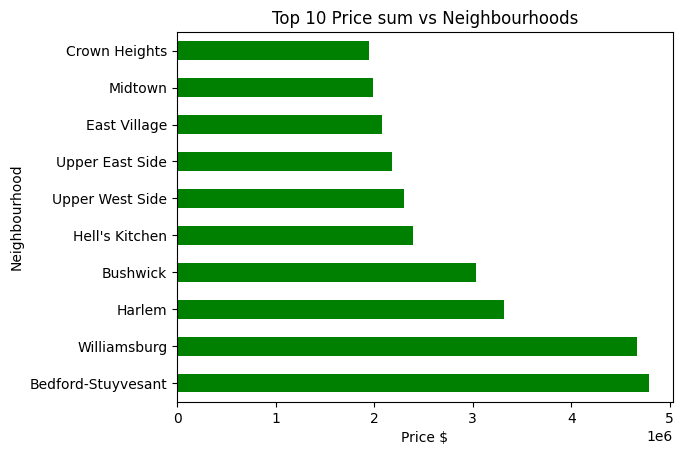

In [46]:
# 1. List the top 10 neighbourhoods in the increasing order of their price with the help of a horizontal bar graph. 

airbnb_top_10_neighbourhoods_sum.head(10).plot(kind='barh', color={'green'})
plt.xlabel('Price $')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Price sum vs Neighbourhoods')
plt.show()

In [47]:
airbnb_top_10_neighbourhoods_mean = airbnb['price'].groupby(airbnb['neighbourhood']).mean().sort_values(ascending=False)
print(airbnb_top_10_neighbourhoods_mean)

neighbourhood
New Dorp                      1045.333333
Chelsea, Staten Island        1042.000000
Fort Wadsworth                1024.000000
Little Neck                    817.750000
Jamaica Hills                  812.904762
                                 ...     
Rossville                      327.500000
Breezy Point                   309.888889
Spuyten Duyvil                 307.000000
Bay Terrace, Staten Island     306.000000
Lighthouse Hill                107.666667
Name: price, Length: 224, dtype: float64


In [48]:
airbnb_top_10_neighbourhoods_mean.head(10)

neighbourhood
New Dorp                  1045.333333
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Shore Acres                805.142857
Arden Heights              804.888889
Midland Beach              796.176471
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64

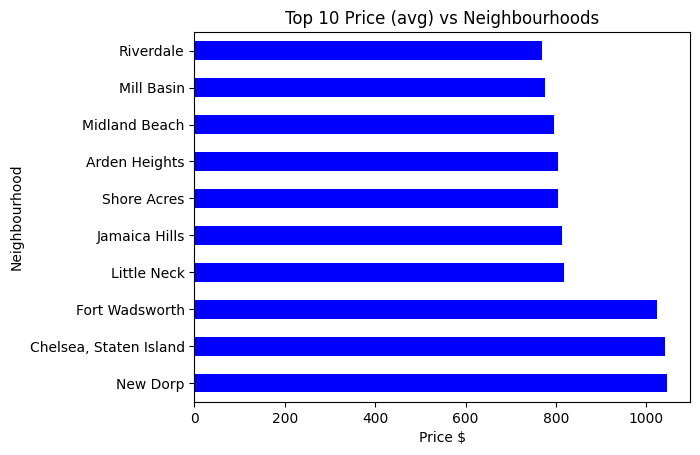

In [49]:
airbnb_top_10_neighbourhoods_mean.head(10).plot(kind='barh', color={'blue'})
plt.xlabel('Price $')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Price (avg) vs Neighbourhoods')
plt.show()

In [50]:
# Which is the cheapest neighbourhood?
'''The cheapest neighbourhood out of the Top 10 by Sum is Crown Heights if you go by average price the cheapest neigbourhood out of the Top 10 is Riverdale. The cheapest out of all the nieghbourhoods for both the sum and the average is Lighthouse Hill.'''

'The cheapest neighbourhood out of the Top 10 by Sum is Crown Heights if you go by average price the cheapest neigbourhood out of the Top 10 is Riverdale. The cheapest out of all the nieghbourhoods for both the sum and the average is Lighthouse Hill.'

In [51]:
#  2. List the neighbourhoods which offer short term rentals within 10 days. Illustrate with a bar graph

airbnb['minimum_nights'].unique()

array([   10,    30,     3,    45,     2,     1,     5,     4,    90,
           7,    14,    60,   180,     9,    31,     6,    15,    29,
           8,    47,    81,   144,   371,   149,   273,   131,   275,
         323,    59,    99,   268,   -10,   189,   340,   128,   350,
         166,   110,    57,   142,   366,    28,   200,    50,   399,
          17,    11,   452,    25,    13,  3455,    -5,    21,    27,
          18,   365,    -1,    20,   -12,    40,    44,   398,    -2,
          65,    -3,    55,   120,   122,    19,   240,    88,   115,
         150,   370,    16,    80,   181,    26,   265,   300,   185,
         360,    56,    12,    70,    39,    24,    32,  1000,   270,
          22,    75,   250,    62,    23,  1250,   364,    74,   198,
         100,   500,    43,    35,    91,   480,    53,   160,   999,
         186,    68,    93,    87,   183,   299,   175,    98,   133,
         354,    42,    33,    37,   225,   400,   105,   184,   153,
         134,   222,

In [52]:
airbnb_short_term_rentals = airbnb[airbnb['minimum_nights']<10]
airbnb_short_term_rentals['neighbourhood_group'].value_counts()

neighbourhood_group
Brooklyn         34343
Manhattan        32788
Queens           10970
Bronx             2367
Staten Island      829
Name: count, dtype: int64

Text(0, 0.5, 'Minimum Nights')

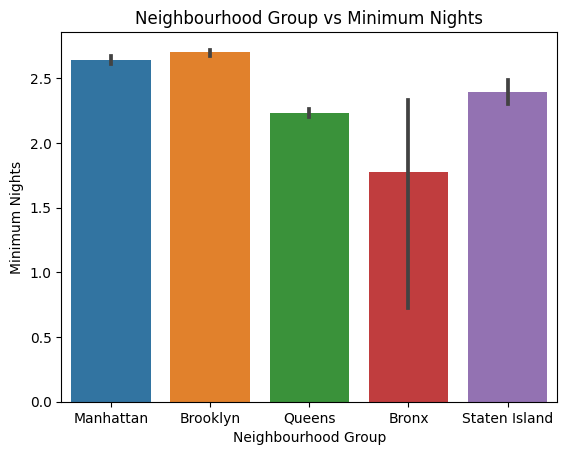

In [53]:
sns.barplot(x='neighbourhood_group',
           y='minimum_nights',
           data=airbnb_short_term_rentals).set(title='Neighbourhood Group vs Minimum Nights')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Minimum Nights")

In [54]:
#  3. List the prices with respect to room type using a bar graph and also state your inferences.

airbnb_prices_by_room_type = airbnb.groupby(['room_type']).agg(mean_price=('price', 'mean'))

In [55]:
airbnb.reset_index()

,index,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules,license
0,0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,966.0,193.0,10,9.0,10/19/2021,0.21,4.0,6.0,286,Clean up and treat the home the way you'd like...,41662/AL
1,1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142.0,28.0,30,45.0,5/21/2022,0.38,4.0,2.0,228,Pet friendly but please confirm with me if the...,41662/AL
2,2,THE VILLAGE OF HARLEM....NEW YORK !,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005,620.0,124.0,3,0.0,6/23/2019,0.74,5.0,1.0,352,"I encourage you to use my kitchen, cooking and...",41662/AL
3,3,Home away from home,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005,368.0,74.0,30,270.0,7/5/2019,4.64,4.0,1.0,322,#NAME?,41662/AL
4,4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,204.0,41.0,10,9.0,11/19/2018,0.10,3.0,1.0,289,"Please no smoking in the house, porch or on th...",41662/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99133,102053,Cozy bright room near Prospect Park,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Private room,2012,696.0,41.0,7,12.0,3/27/2019,0.44,5.0,1.0,0,Shoes off Clean After yourself Turn Lights and...,41662/AL
99134,102054,Private Bedroom with Amazing Rooftop View,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,2012,909.0,41.0,1,19.0,8/31/2017,0.72,3.0,2.0,0,#NAME?,41662/AL
99135,102055,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entire home/apt,2012,387.0,41.0,2,50.0,6/26/2019,3.12,4.0,2.0,235,* Check out: 10am * We made an effort to keep ...,41662/AL
99136,102056,Room & private bathroom in historic Harlem,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,True,strict,Private room,2012,848.0,41.0,2,0.0,6/23/2019,0.74,1.0,1.0,0,Each of us is working and/or going to school a...,41662/AL


In [56]:
airbnb_prices_by_room_type.head()

,mean_price
room_type,
Entire home/apt,624.227711
Hotel room,666.391304
Private room,623.842516
Shared room,630.912517


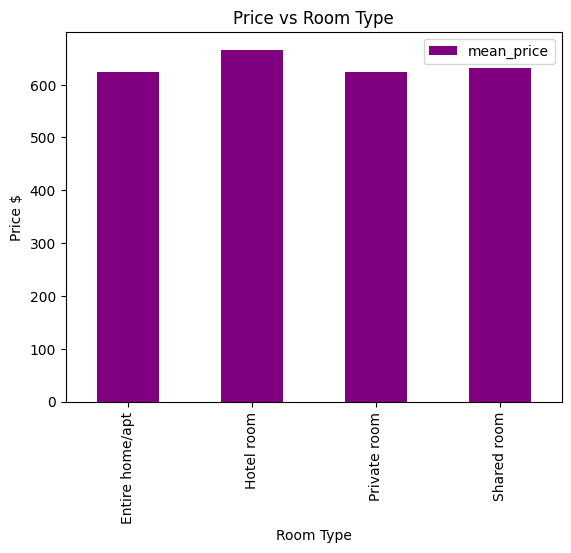

In [57]:
#  3. List the prices with respect to room type using a bar graph and also state your inferences.

airbnb_prices_by_room_type.head().plot(kind='bar', color={'purple'})
plt.xlabel('Room Type')
plt.ylabel('Price $')
plt.title('Price vs Room Type')
plt.show()

In [58]:
airbnb_prices_by_room_type = airbnb.groupby(['room_type']).agg(max_price=('price', 'max')).reset_index()

In [59]:
airbnb_prices_by_room_type.head()

,room_type,max_price
0,Entire home/apt,1200.0
1,Hotel room,1193.0
2,Private room,1200.0
3,Shared room,1199.0


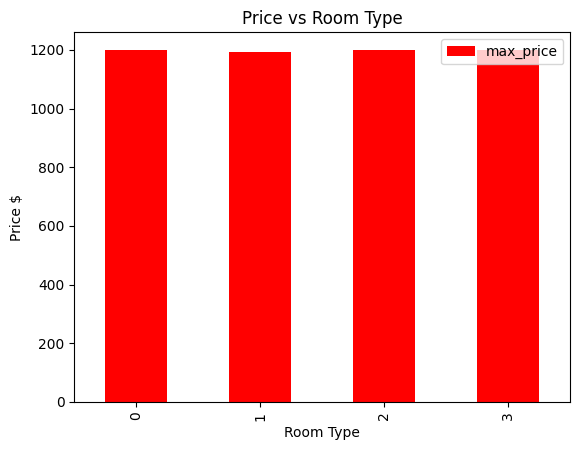

In [60]:
airbnb_prices_by_room_type.head().plot(kind='bar', color={'red'})
plt.xlabel('Room Type')
plt.ylabel('Price $')
plt.title('Price vs Room Type')
plt.show()

In [61]:
airbnb_prices_by_room_type = airbnb.groupby(['room_type']).agg(min_price=('price', 'min')).reset_index()

In [62]:
airbnb_prices_by_room_type.head()

,room_type,min_price
0,Entire home/apt,50.0
1,Hotel room,50.0
2,Private room,50.0
3,Shared room,50.0


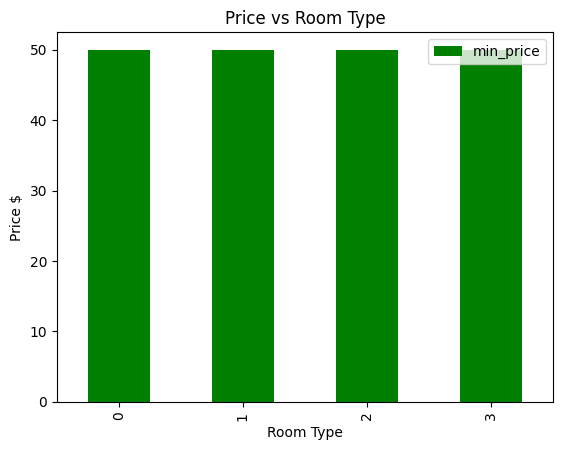

In [63]:
airbnb_prices_by_room_type.head().plot(kind='bar', color={'green'})
plt.xlabel('Room Type')
plt.ylabel('Price $')
plt.title('Price vs Room Type')
plt.show()

In [64]:
#  3. List the prices with respect to room type using a bar graph and also state your inferences.

'''Hotel rooms are more expensive on average than the other room types, the average price is $666 compared to the cheapest room type on average to rent the Private room which is $623 on average to rent. However the Entire home/appartment and Private Room have the most expensive price that could be paid at $1200. The cheapest price that could be paid is $50 and you can get any room type for this price. '''

'Hotel rooms are more expensive on average than the other room types, the average price is $666 compared to the cheapest room type on average to rent the Private room which is $623 on average to rent. However the Entire home/appartment and Private Room have the most expensive price that could be paid at $1200. The cheapest price that could be paid is $50 and you can get any room type for this price. '

In [65]:
#  4. Create a pie chart that shows distribution of booked days for each neighbourhood group. Which neighbourhood has the highest booking percentage?

airbnb_days_booked_neighbourhood_group = airbnb['days_booked'].groupby(airbnb['neighbourhood_group']).mean().sort_values().reset_index()
print(airbnb_days_booked_neighbourhood_group)

  neighbourhood_group  days_booked
0            Brooklyn   130.763363
1           Manhattan   142.702121
2              Queens   162.424977
3               Bronx   178.993117
4       Staten Island   195.989130


([<matplotlib.patches.Wedge at 0x79083f4297e0>,
 [Text(0.9618279143982374, 0.5337481270078022, 'Brooklyn'),
  Text(0.005146054216595288, 1.0999879627186837, 'Manhattan'),
  Text(-1.0160101502883256, 0.4215725020813078, 'Queens'),
  Text(-0.6580950419600305, -0.8814255020973842, 'Bronx'),
  Text(0.7978290520241899, -0.7572772304421826, 'Staten Island')],
 [Text(0.524633407853584, 0.2911353420042557, '16%'),
  Text(0.0028069386635974298, 0.599993434210191, '18%'),
  Text(-0.554187354702723, 0.22994863749889513, '20%'),
  Text(-0.35896093197819845, -0.4807775465985732, '22%'),
  Text(0.4351794829222853, -0.4130603075139178, '24%')])

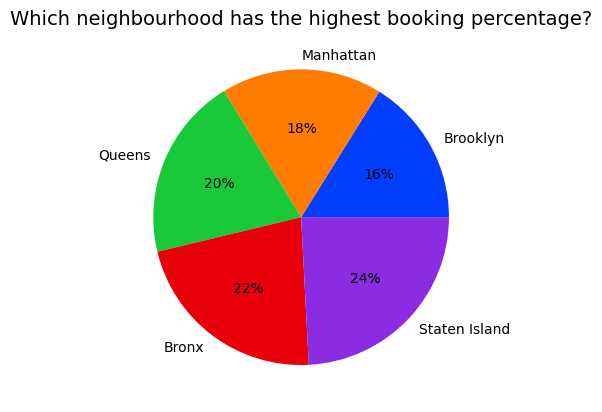

In [66]:
palette_color = sns.color_palette('bright')
plt.title('Which neighbourhood has the highest booking percentage?', size=14, color='black')
plt.pie(airbnb_days_booked_neighbourhood_group['days_booked'], 
        labels=airbnb_days_booked_neighbourhood_group['neighbourhood_group'], 
        colors=palette_color,
        autopct='%1.0f%%')

In [67]:
# Which neighbourhood has the highest booking percentage?
''' Staten Island has the highest number of days booked with 24%. Brooklyn has the least with only 16%.'''

' Staten Island has the highest number of days booked with 24%. Brooklyn has the least with only 16%.'

## **Task 5b: Data Visualization**
1. Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
1. Using a line graph show in which year the maximum construction of rooms took place.

<Axes: title={'center': 'Relationship between Price and Service Fee'}, xlabel='Price', ylabel='Service Fee'>

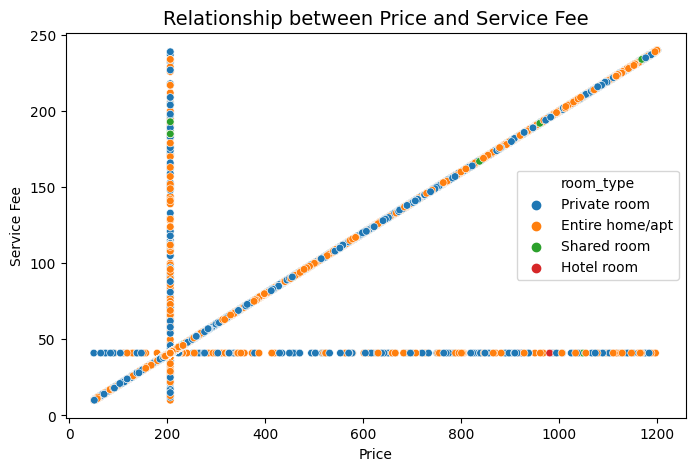

In [68]:
# 1. Does service price and room price have an impact on each other? Illustrate this relationship with a scatter plot and state your inferences

plt.figure(figsize=(8,5))
plt.title('Relationship between Price and Service Fee', size=14, color='black')
plt.xlabel("Price")
plt.ylabel("Service Fee")
sns.scatterplot(x=airbnb['price'], y=airbnb['service_fee'], hue=airbnb['room_type'], s=30)

In [69]:
''' The scatterplot shows a correlation between Price and Service Fee as the price increases so does the service fee. Although there are outliers where the service fee is fixed/stays the same at approx $45 when the price rises and also ouliers where the price is staying the same at $200 but the service fee varies up to almost $250.'''

' The scatterplot shows a correlation between Price and Service Fee as the price increases so does the service fee. Although there are outliers where the service fee is fixed/stays the same at approx $45 when the price rises and also ouliers where the price is staying the same at $200 but the service fee varies up to almost $250.'

In [70]:
airbnb.columns

Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

In [71]:
# 2. Using a line graph show in which year the maximum construction of rooms took place.

airbnb['construction_year_counts'] = airbnb['construction_year'].value_counts()

In [72]:
airbnb['construction_year'].unique()

array([2020, 2007, 2005, 2009, 2013, 2015, 2004, 2008, 2010, 2019, 2018,
       2006, 2016, 2017, 2021, 2003, 2011, 2012, 2022, 2014])

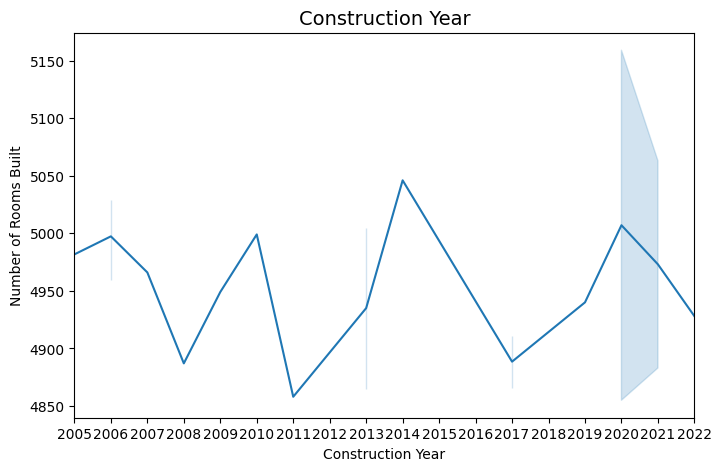

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
plt.title('Construction Year', size=14, color='black')
sns.lineplot(x='construction_year', y='construction_year_counts', data=airbnb, ax=ax)
ax.set_xlim(2005,2022)
ax.set_xticks(range(2005,2023))
plt.xlabel("Construction Year")
plt.ylabel("Number of Rooms Built")
plt.show()


## **Task 5c: Data Visualization**
With the help of box plots illustrate the following:
1. Effect of Review Rate number on price
1. Effect of host identity verified on price

In [74]:
airbnb.columns

Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules',
       'license', 'construction_year_counts'],
      dtype='object')

Text(0, 0.5, 'Price')

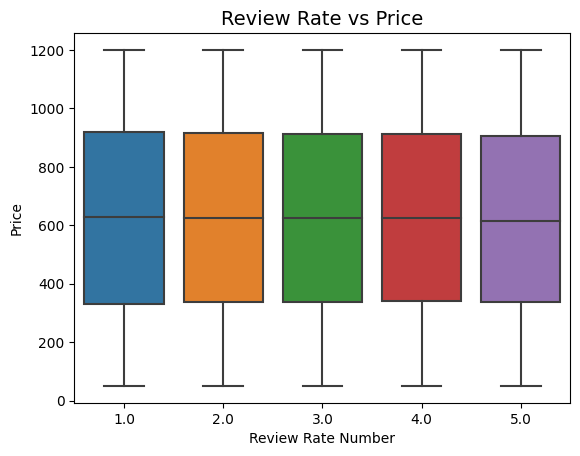

In [75]:
# 1. Use a box plot to illustrate the effect of Review Rate number on Price

sns.boxplot(x='review_rate_number', y='price', data=airbnb)
plt.title('Review Rate vs Price', size=14, color='black')
plt.xlabel("Review Rate Number")
plt.ylabel("Price")

In [76]:
airbnb[['review_rate_number', 'price']].head(25)

,review_rate_number,price
0,4.0,966.0
1,4.0,142.0
2,5.0,620.0
3,4.0,368.0
4,3.0,204.0
5,3.0,577.0
6,5.0,71.0
7,5.0,1060.0
8,3.0,1018.0
9,5.0,291.0


In [77]:
''' There is no impact on price from the Review Rate. Whether a room has 1 star or 5 stars has no impact on the price. There are also no outliers.'''

' There is no impact on price from the Review Rate. Whether a room has 1 star or 5 stars has no impact on the price. There are also no outliers.'

Text(0.5, 1.0, 'Host Identity Verified vs Price')

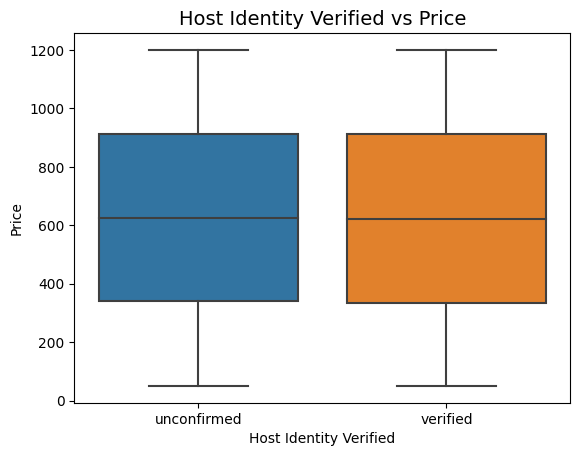

In [78]:
# 2. Use a box plot to illustrate the effect of host identity verified on price

sns.boxplot(x='host_identity_verified', y='price', data=airbnb)
plt.xlabel("Host Identity Verified")
plt.ylabel("Price")
plt.title('Host Identity Verified vs Price', size=14, color='black')

In [79]:
airbnb[['host_identity_verified', 'price']].head(10)

,host_identity_verified,price
0,unconfirmed,966.0
1,verified,142.0
2,unconfirmed,620.0
3,unconfirmed,368.0
4,verified,204.0
5,verified,577.0
6,unconfirmed,71.0
7,unconfirmed,1060.0
8,verified,1018.0
9,unconfirmed,291.0


In [80]:
''' There is no impact on price from whether the host is unconfirmed or verified. There are also no outliers.'''

' There is no impact on price from whether the host is unconfirmed or verified. There are also no outliers.'

## **Extra Visualisation**

In [81]:
def filtered_table(dataFrame, column, value):
    filteredTable  = dataFrame[dataFrame[column] == value]
    return filteredTable
def selectneighbourhood(dataFrame, group, value, by):
    selectedTable = dataFrame.groupby(group)[value].mean()
    selectedTable = pd.DataFrame(selectedTable)
    selectedTable.sort_values(by = by, ascending= False )
    return selectedTable

In [82]:
airbnb_brooklyn = filtered_table(airbnb, "neighbourhood_group", "Brooklyn")
airbnb_booklyn_price = selectneighbourhood(airbnb_brooklyn,"neighbourhood", "price", "price")
airbnb_manhattan = filtered_table(airbnb, "neighbourhood_group", "Manhattan")
airbnb_manhattan_price = selectneighbourhood(airbnb_manhattan,"neighbourhood", "price", "price")
airbnb_bronx = filtered_table(airbnb, "neighbourhood_group", "Bronx")
airbnb_bronx_price = selectneighbourhood(airbnb_bronx,"neighbourhood", "price", "price")
airbnb_queens = filtered_table(airbnb, "neighbourhood_group", "Queens")
airbnb_queens_price = selectneighbourhood(airbnb_queens,"neighbourhood", "price", "price")
airbnb_staten_island = filtered_table(airbnb, "neighbourhood_group", "Staten Island")
airbnb_staten_island_price = selectneighbourhood(airbnb_staten_island,"neighbourhood", "price", "price")

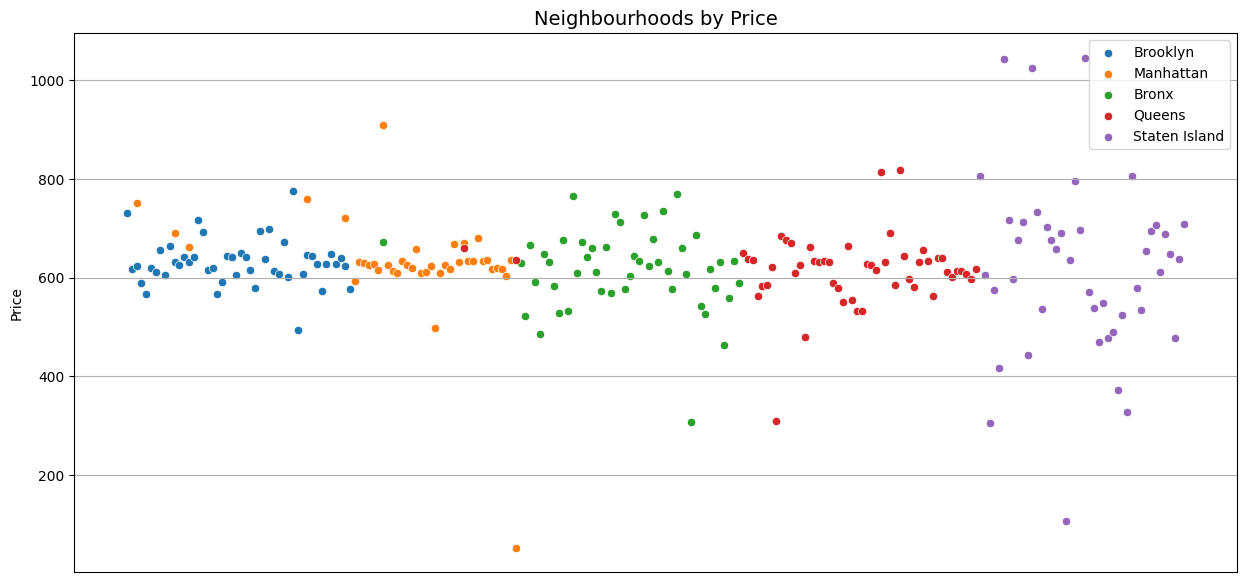

In [83]:
plt.figure(figsize= (15,7))
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Brooklyn",
            data = airbnb_booklyn_price);
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Manhattan",
            data = airbnb_manhattan_price);
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Bronx",
            data = airbnb_bronx_price);
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Queens",
            data = airbnb_queens_price);
sns.scatterplot(x = "neighbourhood",
            y = "price",
            label = "Staten Island",
            data = airbnb_staten_island_price);
plt.xticks([])
plt.xlabel("")
plt.ylabel("Price")
plt.title('Neighbourhoods by Price', size=14, color='black')
plt.grid(True)
plt.show()